Сначала разберемся с координатами

(240, 240, 155)


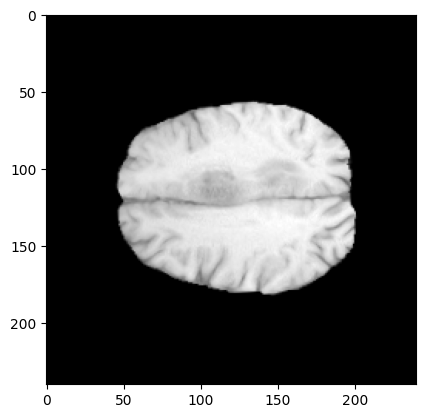

In [53]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

path = r'F:\!наука\stroke\Brain Tumor\MICCAI_BraTS_2019_Data_Training\HGG\BraTS19_2013_2_1'
img = nib.load(f'{path}\BraTS19_2013_2_1_t1.nii')
img_data = img.get_fdata()
plt.imshow(img_data[:, :, 100], cmap='gray')
print(img.shape)
#последняя координата - это координата по z (низ-верх)

Эта информация хранится в другом фрагменте метаданных в заголовке файла, который называется **«аффинной матрицей»**. Это матрица 4х4, содержащая информацию, сообщающую нам, как объем сбора данных был расположен относительно прибора МРТ и относительно мозга субъекта, который находится внутри магнита. *Аффинная матрица, хранящаяся вместе с данными, позволяет однозначно обозначить расположение объема данных относительно сканера*.

### Подробнее о координатах
когда мы проводим измерения с помощью приборов МРТ, мы определяем систему координат сканера как систему координат, начало координат которой лежит в изоцентре сканера. 
Объект помещается на кровать лицом вверх.
Мы можем определить первую ось (x) как ту, которая проходит слева направо через мозг субъекта, когда он лежит внутри отверстия МРТ, а вторая ось (y) определяется как идущая от пола камеры.
Последняя ось (z) проходит от их ног, лежащих вне магнита, через макушку головы (это «нижний-верхний»). Опираясь на эти оси, мы говорим, что данная система координат имеет ориентацию «RAS» (правая, передняя, ​​верхняя). Это означает, что координаты увеличиваются к правой стороне субъекта, к передней части его мозга и к верхней части его головы.

В пространственной системе координат магнита МРТ.

 Как мы говорили выше, начало пространства сканера находится в изоцентре магнита. Но данные МРТ обычно берут свое начало где-то за пределами головы субъекта, так что они охватывают весь мозг. Итак, нам необходимо переместить начало пространства из изоцентра в базис сканируемого объема. Математически это означает сдвиг каждой координаты в пространстве сканера на $ [\Delta x,
\Delta у,
\Delta z]$, где каждый из этих компонентов описывает, где находится базис МРТ относительно положения изоцентра.

К сожалению, это не та операция, которую мы можем выполнить, умножив координаты на матрицу 3х3. 

Вместо этого нам нужно будет использовать математический трюк: мы добавим к координатам размерность, чтобы они были записаны как $[x, y, z, 1]$. Это из-за того, что аффинная матрица выглядит так 4х4:

$ aff = 
 \begin{bmatrix}  &  &  & \Delta x \\  & A_{total} &  & \Delta y\\ &  &  & \Delta y \\ 0 & 0 & 0 & 1 \end{bmatrix}$

где $A_{total}$ 
— это матрица, состоящая из наших вращений и масштабирований,

$aff$ - это и есть аффинная матрица, которую получаем .affine.

In [19]:
#Get the affine matrix and convert the coordinates.
aff = img.affine
print(aff @ np.array([0, 0, 0, 1]))
print(aff @ np.array([0, 0, 1, 1]))

[  0. 239.   0.   1.]
[  0. 239.   1.   1.]


Это говорит нам о том, что элемент, обозначенный как $[0, 0, 0]$, расположен на 0 мм левее изоцентра, на 239 мм вперед от изоцентра (в сторону потолка комнаты) и на 0 мм ниже изоцентра (в сторону той стороны комнаты, где находятся ноги испытуемого(торчат из МРТ)).

(256, 256, 25, 2)


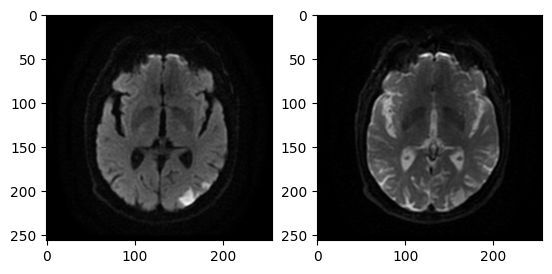

In [7]:
from nilearn import image
# посмотри на изображение из наших
img_ = nib.load(r'F:\!наука\stroke\Lesions\Lesions\Aterotromb\Balandin_VP\dwi.nii.gz')
print(img_.shape)
#у нас изображения 4-мерные, нужно от 4 измерения избавиться для построения графика
img_1 = image.index_img(img_, 0)
img_2 = image.index_img(img_, 1)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_1.get_fdata()[:, :, 12], cmap='gray')
ax[1].imshow(img_2.get_fdata()[:, :, 12], cmap='gray')
plt.show()

In [26]:
aff2 = img_1.affine
print(aff2 @ np.array([0, 0, 0, 1]))
print(aff2 @ np.array([0, 0, 1, 1]))
print(aff2 @ np.array([0, 0, 12, 1]))
print(aff2 @ np.array([0, 0, 24, 1]))

[-125.74788666  149.44915771  -24.8061924     1.        ]
[-125.35511974  147.33487272  -19.20488405    1.        ]
[-121.03468359  124.07773781   42.40950775    1.        ]
[-116.32148051   98.7063179   109.6252079     1.        ]


Не всё так очевидно! Обратим внимание, что наши изображения ещё и оринтированны по-разному. И преобразование идёт тоже не так очевидно. Но 1 и 2 координаты явно меняются не так значительно, как координаты по 3 оси, очевидно, это и есть наша ось z.


(256, 256, 25, 2)


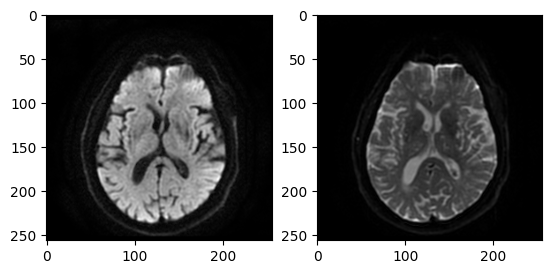

In [39]:
# посмотри на ещё одно изображение из наших
img__ = nib.load(r'F:\!наука\stroke\Lesions\Lesions\CardioEmbolic\Berezina\dwi.nii.gz')
print(img_.shape)
#у нас изображения 4-мерные, нужно от 4 измерения избавиться для построения графика
img_21 = image.index_img(img_, 0)
img_22 = image.index_img(img_, 1)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img_21.get_fdata()[:, :, 12], cmap='gray')
ax[1].imshow(img_22.get_fdata()[:, :, 12], cmap='gray')
plt.show()

In [35]:
aff3 = img_21.affine
print(aff2 @ np.array([0, 0, 0, 1]))
print(aff3 @ np.array([0, 0, 0, 1]))
print(aff2 @ np.array([0, 0, 1, 1]))
print(aff3 @ np.array([0, 0, 1, 1]))
print(aff2 @ np.array([0, 0, 12, 1]))
print(aff3 @ np.array([0, 0, 12, 1]))
print(aff2 @ np.array([0, 0, 24, 1]))
print(aff3 @ np.array([0, 0, 24, 1]))

[-125.74788666  149.44915771  -24.8061924     1.        ]
[-125.74788666  149.44915771  -24.8061924     1.        ]
[-125.35511974  147.33487272  -19.20488405    1.        ]
[-125.35511974  147.33487272  -19.20488405    1.        ]
[-121.03468359  124.07773781   42.40950775    1.        ]
[-121.03468359  124.07773781   42.40950775    1.        ]
[-116.32148051   98.7063179   109.6252079     1.        ]
[-116.32148051   98.7063179   109.6252079     1.        ]
